# Time Series Data Exercises

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vega_datasets import data

## `sf_temps()`

In [2]:
# get data
df = data.sf_temps()

In [3]:
# take a look
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.shape

(8759, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [6]:
# make time data into index
df = df.set_index('date')
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


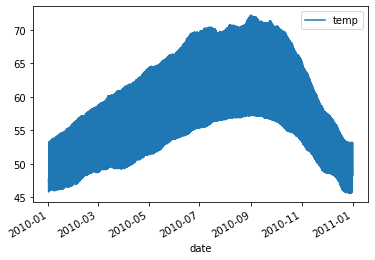

In [7]:
df.plot();

### 1.

Resample by the day and take the average temperature. Visualize the average temperature over time.

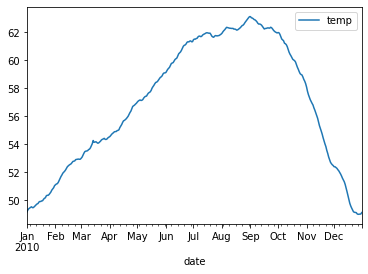

In [8]:
df.resample('D').mean().plot();

### 2.

Write the code necessary to visualize the minimum temperature over time.

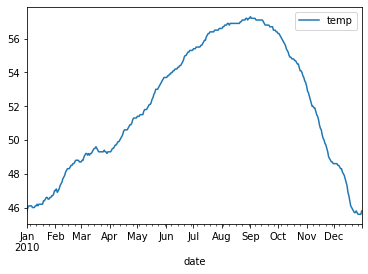

In [9]:
df.resample('D').min().plot();

### 3.

Write the code necessary to visualize the maximum temperature over time.

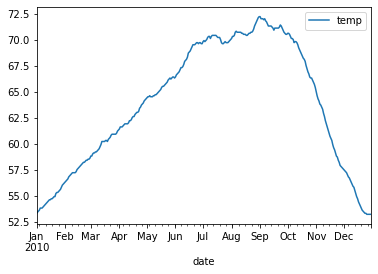

In [10]:
df.resample('D').max().plot();

### 4.

Which month is the coldest, on average?

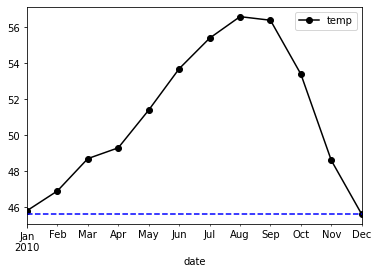

In [11]:
df.resample('M').min().plot(marker='o', color = 'black')
plt.axhline(df.resample('M').min().min()[0], ls='--', color = 'blue');

In [12]:
df.resample('M').min().style.highlight_min(color='blue')

,temp
date,
2010-01-31 00:00:00,45.800000
2010-02-28 00:00:00,46.900000
2010-03-31 00:00:00,48.700000
2010-04-30 00:00:00,49.300000
2010-05-31 00:00:00,51.400000
2010-06-30 00:00:00,53.700000
2010-07-31 00:00:00,55.400000
2010-08-31 00:00:00,56.600000
2010-09-30 00:00:00,56.400000


**December**

### 5.

Which month has the highest average temperature?

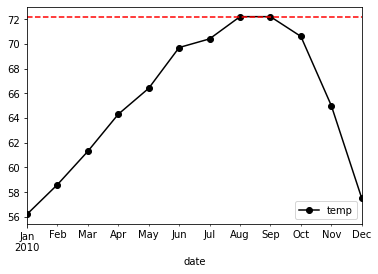

In [13]:
df.resample('M').max().plot(marker='o', color = 'black')
plt.axhline(df.resample('M').max().max()[0], ls='--', color = 'red')
plt.legend();

In [14]:
df.resample('M').max().style.highlight_max(color='red')

,temp
date,
2010-01-31 00:00:00,56.200000
2010-02-28 00:00:00,58.600000
2010-03-31 00:00:00,61.300000
2010-04-30 00:00:00,64.300000
2010-05-31 00:00:00,66.400000
2010-06-30 00:00:00,69.700000
2010-07-31 00:00:00,70.400000
2010-08-31 00:00:00,72.200000
2010-09-30 00:00:00,72.200000


**August and September**

### 6.

Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [15]:
min_max = df.resample('D').agg(['min', 'max'])
min_max.head()

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8

In [16]:
min_max.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [17]:
min_max['daily_temp_delta'] = min_max[('temp', 'max')] - min_max[('temp', 'min')]

In [18]:
min_max.head()

temp       daily_temp_delta
             min   max                 
date                                   
2010-01-01  45.8  53.3              7.5
2010-01-02  46.0  53.4              7.4
2010-01-03  46.1  53.5              7.4
2010-01-04  46.1  53.6              7.5
2010-01-05  46.1  53.8              7.7

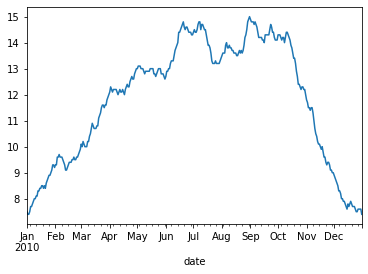

In [19]:
min_max.daily_temp_delta.plot();

In [20]:
# this shows the month with the highest average temperature delta
pd.DataFrame(min_max.daily_temp_delta.resample('M').mean()).style.highlight_max(color='green')

,daily_temp_delta
date,
2010-01-31 00:00:00,8.341935
2010-02-28 00:00:00,9.485714
2010-03-31 00:00:00,10.854839
2010-04-30 00:00:00,12.320000
2010-05-31 00:00:00,12.909677
2010-06-30 00:00:00,13.950000
2010-07-31 00:00:00,13.977419
2010-08-31 00:00:00,13.870968
2010-09-30 00:00:00,14.403333


In [21]:
# this finds the single data with the highest temp delta
min_max[min_max.daily_temp_delta == min_max.daily_temp_delta.max()]

temp       daily_temp_delta
             min   max                 
date                                   
2010-08-31  57.2  72.2             15.0

### 7. (Bonus)

Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [22]:
daily_average = df.resample('D').mean()
daily_max = df.resample('D').max()
daily_min = df.resample('D').min()

In [23]:
dailies = df.resample('D').mean()

In [24]:
dailies['max'] = daily_max

In [25]:
dailies['min'] = daily_min

In [26]:
dailies = dailies.rename(columns={'temp' : 'avg'})

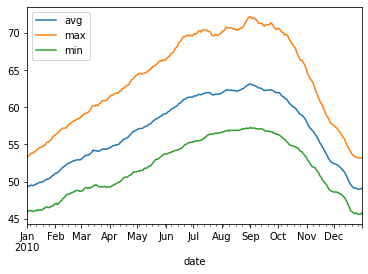

In [27]:
dailies.plot();

## `seattle_weather()`

In [28]:
df = data.seattle_weather()

In [29]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [30]:
df.shape

(1461, 6)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [32]:
df = df.set_index('date')

In [33]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


### 1.

Which year and month combination has the highest amount of precipitation?

In [34]:
df[['precipitation']].resample('M').sum().sort_values(by='precipitation', ascending=False).head().style.highlight_max(color='blue')

,precipitation
date,
2015-12-31 00:00:00,284.500000
2014-03-31 00:00:00,240.000000
2015-11-30 00:00:00,212.600000
2012-11-30 00:00:00,210.500000
2012-03-31 00:00:00,183.000000


**December 2015 had the most total precipitation**

### 2.

Visualize the amount of monthly precipitation over time.

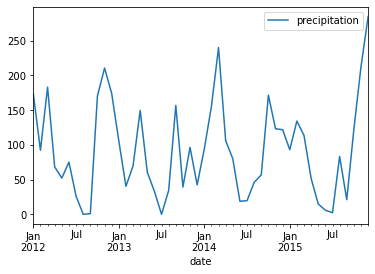

In [35]:
df[['precipitation']].resample('M').sum().plot();

### 3.

Visualize the amount of wind over time. Choose a time interval you think is appropriate.

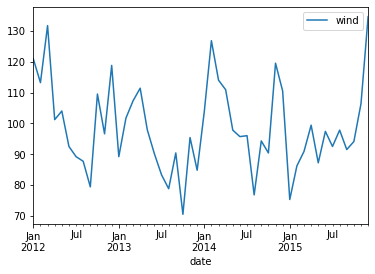

In [36]:
df[['wind']].resample('M').sum().plot();

### 4.

Which year-month combination is the windiest?

In [37]:
df[['wind']].resample('M').mean().sort_values(by='wind', ascending=False).head().style.highlight_max(color='blue')

,wind
date,
2014-02-28 00:00:00,4.528571
2015-12-31 00:00:00,4.341935
2012-03-31 00:00:00,4.248387
2014-11-30 00:00:00,3.983333
2012-02-29 00:00:00,3.903448


***February 2014 has the highest average wind speed***

### 5.

What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [38]:
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,year
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,2012


In [39]:
sunny = df[['weather', 'year']]

In [40]:
sunny[sunny.weather == 'sun'].value_counts()

weather  year
sun      2014    211
         2013    205
         2015    180
         2012    118
dtype: int64

***2014 has the most sunny days***

In [41]:
pd.crosstab(df.year, df.weather).style.highlight_max(color='red')

weather,drizzle,fog,rain,snow,sun
year,,,,,
2012,31,5,191,21,118
2013,16,82,60,2,205
2014,0,151,3,0,211
2015,7,173,5,0,180


### 6.

In which month does it rain the most?

In [42]:
df['month'] = df.index.month
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


In [44]:
pd.crosstab(df.month, df.weather).style.highlight_max(color='red')

weather,drizzle,fog,rain,snow,sun
month,,,,,
1,10,38,35,8,33
2,4,36,40,3,30
3,3,36,37,6,42
4,4,34,20,1,61
5,1,25,16,0,82
6,2,14,19,0,85
7,8,13,14,0,89
8,8,16,6,0,94
9,5,40,4,0,71


### 7.

Which month has the most number of days with a non-zero amount of precipitation?

In [47]:
df.precipitation != 0

date
2012-01-01    False
2012-01-02     True
2012-01-03     True
2012-01-04     True
2012-01-05     True
              ...  
2015-12-27     True
2015-12-28     True
2015-12-29    False
2015-12-30    False
2015-12-31    False
Name: precipitation, Length: 1461, dtype: bool

In [48]:
df['had_precip'] = np.where(df.precipitation != 0, 'Yes', 'No')

In [51]:
pd.crosstab(df.month, df.had_precip).style.highlight_max(color='red')

had_precip,No,Yes
month,,
1,58,66
2,40,73
3,51,73
4,61,59
5,90,34
6,83,37
7,113,11
8,102,22
9,85,35


## `flights_20k()`

In [64]:
df = data.flights_20k()

In [65]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [66]:
df.shape

(20000, 5)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [68]:
df = df.set_index('date')

In [69]:
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [72]:
(df.delay < 0).sum()

8482

### 1.

Convert any negative delays to 0.

In [73]:
df['delay'] = df.delay.apply(lambda x: 0 if x < 0 else x)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [74]:
(df.delay < 0).sum()

0

### 2.

Which hour of the day has the highest average delay?

In [81]:
# this gives us year, month, day, hour combination with highest average delay
df[['delay']].resample('H').mean().sort_values(by='delay', ascending=False).head().style.highlight_max(color='red')

,delay
date,
2001-02-23 03:00:00,360.000000
2001-02-25 00:00:00,260.000000
2001-01-02 03:00:00,245.000000
2001-02-24 22:00:00,210.000000
2001-02-22 00:00:00,195.000000


In [103]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14
2001-01-31 16:40:00,0,1093,FLL,ISP,16
2001-02-11 18:39:00,3,293,LBB,DAL,18
2001-01-10 21:00:00,0,550,MSY,MCO,21
2001-03-30 21:45:00,0,229,STL,IND,21


In [95]:
df.groupby('hour').delay.agg(['mean']).sort_values(by='mean', ascending=False).head().style.highlight_max(color='red')

,mean
hour,
3,302.500000
1,170.000000
0,127.916667
23,65.353846
22,32.704607


In [101]:
df.groupby('hour').delay.mean().sort_values(ascending=False).head()

hour
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
Name: delay, dtype: float64

### 3.

Does the day of the week make a difference in the delay amount?

In [110]:
df['week_day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday


In [114]:
df.groupby('week_day').delay.agg(['mean']).sort_values(by='mean', ascending=False).head().style.highlight_max(color='red')

,mean
week_day,
Friday,17.757596
Thursday,12.821322
Wednesday,11.032478
Sunday,10.413542
Tuesday,9.410866


### 4.

Does the month make a difference in the delay amount?

In [118]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,week_day,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,January
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,January
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,February
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,January
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,March


In [119]:
df.groupby('month').delay.agg(['mean']).sort_values(by='mean', ascending=False).head().style.highlight_max(color='red')

,mean
month,
February,12.306106
January,11.301592
March,9.875287
